# DataFest 2022

## Import the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Importing the Dataset

In [2]:
df=pd.read_csv("logs.csv")

/var/folders/70/q89cls2j7835xgqtfjz6hw240000gn/T/ipykernel_76374/2533296147.py:1: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("logs.csv")


## Central Question

**Q: How do player demographics such as age influence game engagement and gameplay patterns?**

We thought that demographic variables such as age, sex, and race could be associated with player patterns in the game. 
We chose to measure success in the game by the total number of points scored in each skill category (i.e priority sense, people sense, know sense, refusal power, me power). Since the amount of time played varies between the players, we thought total points would be a good metric to use since it shows the progress of the player during their play time. 

## Data Cleaning

In [3]:
cols=['skill_level_know','skill_level_priority',"skill_level_refusal","skill_level_me",
      "skill_level_people","event_time_dbl","event_id","player_id","avatar_age","avatar_id","avatar_gender","school","event_category","stack_id"]
df=df[cols]

In [4]:
df.columns=["Know_Sense",'Priority_Sense',"Refusal_Power","Me_Power",
      "People_Sense","Cum_Time_Spent_inS","Event_Id","Player_Id","Age","Race","Gender","Interaction","Category","Stack"]

In [5]:
df

,Know_Sense,Priority_Sense,Refusal_Power,Me_Power,People_Sense,Cum_Time_Spent_inS,Event_Id,Player_Id,Age,Race,Gender,Interaction,Category,Stack
0,NaN,NaN,NaN,NaN,NaN,198,600,6427001,13.0,NaN,NaN,3561,Avatar Creation,NaN
1,NaN,NaN,NaN,NaN,NaN,199,601,6427001,NaN,NaN,Male,3561,Avatar Creation,NaN
2,NaN,NaN,NaN,NaN,NaN,205,602,6427001,13.0,NaN,Male,3561,Avatar Creation,NaN
3,NaN,NaN,NaN,NaN,NaN,210,603,6427001,NaN,Hispanic,NaN,3561,Avatar Creation,NaN
4,NaN,NaN,NaN,NaN,NaN,252,604,6427001,NaN,Hispanic,NaN,3561,Avatar Creation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106592,NaN,NaN,NaN,NaN,NaN,5761,706,65670032,NaN,NaN,NaN,1531,Epilogue,NaN
2106593,NaN,NaN,NaN,NaN,NaN,5765,705,65670032,NaN,NaN,NaN,1531,Epilogue,NaN
2106594,NaN,NaN,NaN,NaN,NaN,5767,1,65670032,NaN,NaN,NaN,1531,General,NaN
2106595,NaN,NaN,NaN,NaN,NaN,5767,706,65670032,NaN,NaN,NaN,1531,Epilogue,NaN


In [6]:
for col in cols:
    df=df.groupby("Player_Id").apply(lambda x: x.ffill().bfill())

In [7]:
df.groupby("Player_Id").max()

,Know_Sense,Priority_Sense,Refusal_Power,Me_Power,People_Sense,Cum_Time_Spent_inS,Event_Id,Age,Race,Gender,Interaction,Category,Stack
Player_Id,,,,,,,,,,,,,
6427001,30.0,30.0,26.0,30.0,29.0,37718,1005,13.0,Hispanic,Male,3561,Refuse Power Minigame,12.0
6427002,3.0,3.0,0.0,6.0,3.0,3735,1005,13.0,African American,Female,3561,Priority Sense,12.0
6427004,29.0,29.0,28.0,30.0,29.0,30307,1005,13.0,African American,Female,3561,Refuse Power Minigame,12.0
6427005,0.0,0.0,0.0,6.0,3.0,3729,1005,13.0,Hispanic,Male,3561,Priority Sense,12.0
6427006,29.0,30.0,30.0,30.0,27.0,31927,1005,13.0,African American,Female,3561,Refuse Power Minigame,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626006,6.0,6.0,7.0,12.0,6.0,40352,1005,13.0,Caucasian,Male,3205,Refuse Power Minigame,12.0
6626007,15.0,13.0,18.0,27.0,15.0,467294,1005,11.0,Caucasian,Male,3205,Refuse Power Minigame,12.0
7540835,0.0,0.0,0.0,6.0,0.0,535,708,14.0,Hispanic,Female,3561,Lifeline,12.0


## Basic Seaborn Settings

In [8]:
palette = sns.color_palette(["#C37963", "#BB9E95", "#9FCDCA", "#5E7D7F","#203234"])
sns.set_theme()

## Age v Total Scores by Skill

In [9]:
players=df.groupby("Player_Id").max()

In [10]:
players

,Know_Sense,Priority_Sense,Refusal_Power,Me_Power,People_Sense,Cum_Time_Spent_inS,Event_Id,Age,Race,Gender,Interaction,Category,Stack
Player_Id,,,,,,,,,,,,,
6427001,30.0,30.0,26.0,30.0,29.0,37718,1005,13.0,Hispanic,Male,3561,Refuse Power Minigame,12.0
6427002,3.0,3.0,0.0,6.0,3.0,3735,1005,13.0,African American,Female,3561,Priority Sense,12.0
6427004,29.0,29.0,28.0,30.0,29.0,30307,1005,13.0,African American,Female,3561,Refuse Power Minigame,12.0
6427005,0.0,0.0,0.0,6.0,3.0,3729,1005,13.0,Hispanic,Male,3561,Priority Sense,12.0
6427006,29.0,30.0,30.0,30.0,27.0,31927,1005,13.0,African American,Female,3561,Refuse Power Minigame,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626006,6.0,6.0,7.0,12.0,6.0,40352,1005,13.0,Caucasian,Male,3205,Refuse Power Minigame,12.0
6626007,15.0,13.0,18.0,27.0,15.0,467294,1005,11.0,Caucasian,Male,3205,Refuse Power Minigame,12.0
7540835,0.0,0.0,0.0,6.0,0.0,535,708,14.0,Hispanic,Female,3561,Lifeline,12.0


In [11]:
age_v_total=players.melt(id_vars=['Age'],
                    value_vars=["Know_Sense",'Priority_Sense',
                    "Refusal_Power","Me_Power","People_Sense"])

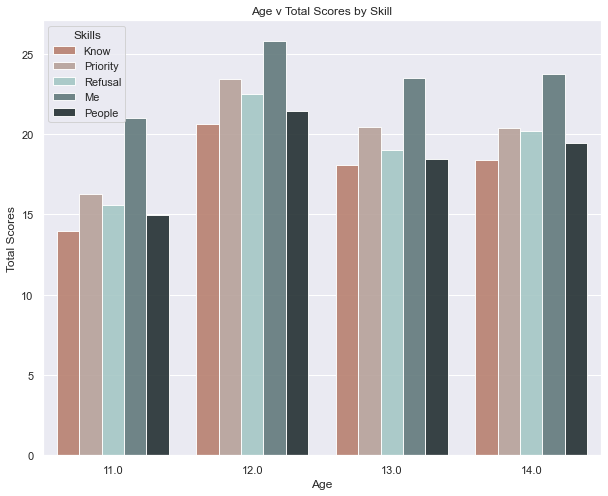

In [12]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(
    data=age_v_total,
    x="Age", y="value",hue="variable",
    ci=None, palette=palette, alpha=.9
).set(title='Age v Total Scores by Skill',ylabel="Total Scores")

plt.legend(title='Skills', loc='upper left', labels=['Know', 'Priority','Refusal','Me','People']);

## Age v Total Time Spent

In [13]:
age_v_total_time=players[["Age","Cum_Time_Spent_inS"]]

In [14]:
age_v_total_time=age_v_total_time.reset_index()

In [15]:
age_v_total_time.groupby("Age").mean()

,Player_Id,Cum_Time_Spent_inS
Age,,
11.0,6.520560e+06,181478.303030
12.0,9.202264e+06,246768.159091
13.0,6.501618e+06,186147.837209
14.0,6.516119e+06,185617.521739


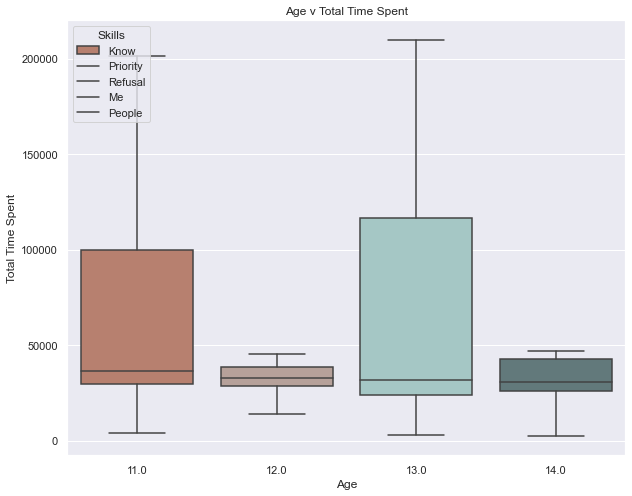

In [16]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.boxplot(
    data=age_v_total_time,
    x="Age", y="Cum_Time_Spent_inS", palette=palette, showfliers=False
).set(title='Age v Total Time Spent',ylabel="Total Time Spent")

plt.legend(title='Skills', loc='upper left', labels=['Know', 'Priority','Refusal','Me','People']);

## Age vs Star/Sec 

In [17]:
players_copy=players.copy()

In [18]:
stars_per_s=players_copy.melt(id_vars=['Age',"Cum_Time_Spent_inS"],
                           value_vars=["Know_Sense",'Priority_Sense',
                         "Refusal_Power","Me_Power","People_Sense"])

In [19]:
stars_per_s

,Age,Cum_Time_Spent_inS,variable,value
0,13.0,37718,Know_Sense,30.0
1,13.0,3735,Know_Sense,3.0
2,13.0,30307,Know_Sense,29.0
3,13.0,3729,Know_Sense,0.0
4,13.0,31927,Know_Sense,29.0
...,...,...,...,...
825,13.0,40352,People_Sense,6.0
826,11.0,467294,People_Sense,15.0
827,14.0,535,People_Sense,0.0
828,12.0,11100,People_Sense,27.0


In [20]:
stars_per_s["stars/sec"]=(stars_per_s["value"]/stars_per_s["Cum_Time_Spent_inS"])

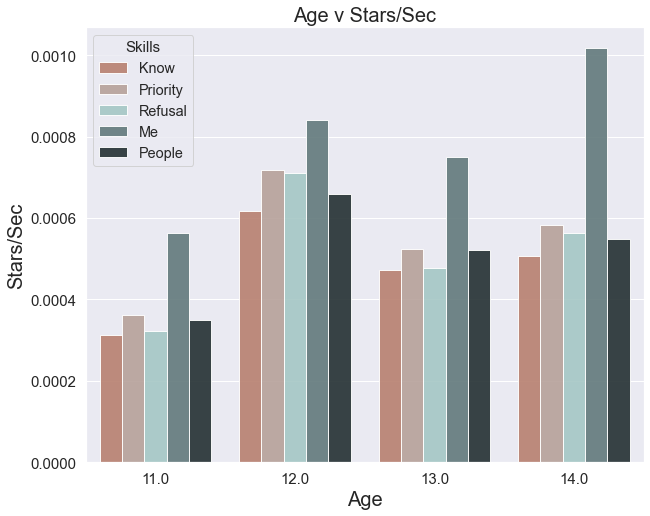

In [21]:
fig,ax=plt.subplots(figsize=(10,8))
p=sns.barplot(
    data=stars_per_s,
    x="Age", y="stars/sec",hue="variable",
    ci=None, palette=palette, alpha=.9,
)

p.tick_params(axis='x', labelsize=15)
p.tick_params(axis='y', labelsize=15)
plt.xlabel('Age', fontsize=20);
plt.ylabel('Stars/Sec', fontsize=20);
plt.title('Age v Stars/Sec', fontsize=20)
plt.legend(title='Skills', loc='upper left', labels=['Know', 'Priority','Refusal','Me','People'],title_fontsize=15,fontsize="large");
plt.savefig("age_v_starpersec")



## Age v Interactions at 4500s


In [22]:
df_45=df[df["Cum_Time_Spent_inS"]<4500]

In [23]:
df_45

,Know_Sense,Priority_Sense,Refusal_Power,Me_Power,People_Sense,Cum_Time_Spent_inS,Event_Id,Player_Id,Age,Race,Gender,Interaction,Category,Stack
0,0.0,0.0,0.0,6.0,0.0,198,600,6427001,13.0,Hispanic,Male,3561,Avatar Creation,12.0
1,0.0,0.0,0.0,6.0,0.0,199,601,6427001,13.0,Hispanic,Male,3561,Avatar Creation,12.0
2,0.0,0.0,0.0,6.0,0.0,205,602,6427001,13.0,Hispanic,Male,3561,Avatar Creation,12.0
3,0.0,0.0,0.0,6.0,0.0,210,603,6427001,13.0,Hispanic,Male,3561,Avatar Creation,12.0
4,0.0,0.0,0.0,6.0,0.0,252,604,6427001,13.0,Hispanic,Male,3561,Avatar Creation,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105646,6.0,9.0,12.0,18.0,17.0,4480,505,65670032,12.0,Hispanic,Male,1531,Refuse Power Minigame,5.0
2105647,6.0,9.0,12.0,18.0,17.0,4481,506,65670032,12.0,Hispanic,Male,1531,Refuse Power Minigame,5.0
2105648,6.0,9.0,12.0,18.0,17.0,4488,507,65670032,12.0,Hispanic,Male,1531,Refuse Power Minigame,5.0
2105649,6.0,9.0,12.0,18.0,17.0,4490,508,65670032,12.0,Hispanic,Male,1531,Refuse Power Minigame,5.0


In [24]:
interactions=df_45.groupby("Player_Id").agg({"Interaction":"count",'Know_Sense':"max",'Priority_Sense':"max",
                                   "Refusal_Power":"max","Me_Power":"max",
                                   "People_Sense":"max","Age":"max"}).reset_index()

In [25]:
players_45=interactions.groupby("Player_Id").max()

In [26]:
players_45

,Interaction,Know_Sense,Priority_Sense,Refusal_Power,Me_Power,People_Sense,Age
Player_Id,,,,,,,
6427001,1767,1.0,3.0,0.0,6.0,2.0,13.0
6427002,1807,3.0,3.0,0.0,6.0,3.0,13.0
6427004,2113,3.0,3.0,0.0,6.0,5.0,13.0
6427005,1573,0.0,0.0,0.0,6.0,3.0,13.0
6427006,2084,3.0,3.0,3.0,9.0,6.0,13.0
...,...,...,...,...,...,...,...
6626006,1017,0.0,3.0,0.0,6.0,2.0,13.0
6626007,1578,0.0,3.0,0.0,6.0,3.0,11.0
7540835,264,0.0,0.0,0.0,6.0,0.0,14.0


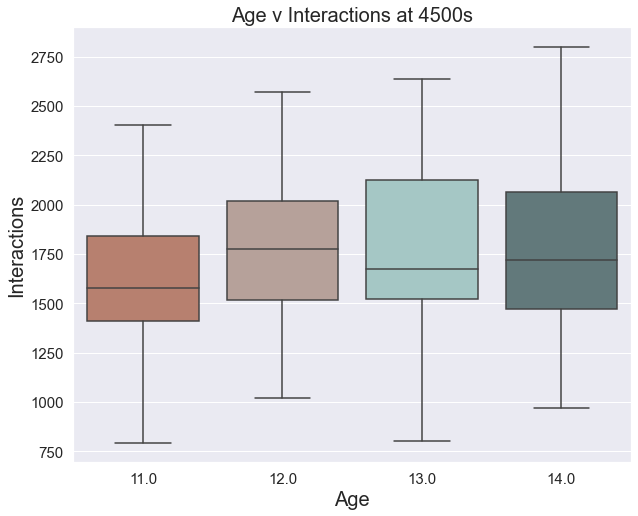

In [27]:
fig,ax=plt.subplots(figsize=(10,8))
p=sns.boxplot(x="Age",y="Interaction",
            data=players_45,showfliers = False,palette=palette)

p.tick_params(axis='x', labelsize=15)
p.tick_params(axis='y', labelsize=15)
plt.xlabel('Age', fontsize=20);
plt.title('Age v Interactions at 4500s', fontsize=20);
plt.ylabel('Interactions', fontsize=20)


plt.savefig("age_v_interactions")

From the above graphs, we see that the median interaction of the 11 y/o are less than the other age groups. This prokmpted us to question what were the groups doing at that time. Thus, we began to dig deeper as to what each group was doing at t=4500s

## Category of Interaction by age at t=4500s

In [28]:
inter=df[(df["Cum_Time_Spent_inS"]>4000) & (df['Cum_Time_Spent_inS']<5000)]

In [29]:
inter=inter.groupby("Player_Id").max().reset_index()

In [30]:
inter

,Player_Id,Know_Sense,Priority_Sense,Refusal_Power,Me_Power,People_Sense,Cum_Time_Spent_inS,Event_Id,Age,Race,Gender,Interaction,Category,Stack
0,6427001,3.0,3.0,0.0,6.0,3.0,4987,1005,13.0,Hispanic,Male,3561,Refuse Power Minigame,1.0
1,6427004,3.0,3.0,3.0,9.0,5.0,4999,1005,13.0,African American,Female,3561,Refuse Power Minigame,2.0
2,6427006,3.0,3.0,3.0,9.0,6.0,4996,1005,13.0,African American,Female,3561,Priority Sense,2.0
3,6427008,3.0,3.0,0.0,6.0,4.0,4879,1005,13.0,African American,Male,3561,Refuse Power Minigame,1.0
4,6427010,0.0,0.0,0.0,6.0,1.0,4380,1004,13.0,African American,Male,3561,People Sense,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,6626005,2.0,2.0,0.0,6.0,3.0,4998,1004,11.0,Hispanic,Male,3205,Priority Sense,0.0
150,6626006,0.0,3.0,0.0,6.0,2.0,4915,1004,13.0,Caucasian,Male,3205,Minigame General,0.0
151,6626007,0.0,3.0,0.0,6.0,3.0,4999,1005,11.0,Caucasian,Male,3205,Minigame General,0.0
152,65670031,9.0,9.0,12.0,18.0,12.0,4999,1005,12.0,African American,Female,1531,Refuse Power Minigame,5.0


In [31]:
age_11=inter[inter["Age"]==11]
print(age_11["Category"].value_counts())
print(age_11["Stack"].value_counts())

Minigame General         11
Priority Sense           11
People Sense              4
Refuse Power Minigame     4
Lifeline                  1
Name: Category, dtype: int64
0.0    27
1.0     3
4.0     1
Name: Stack, dtype: int64


In [32]:
age_12=inter[inter["Age"]==12]
print(age_12["Category"].value_counts())
print(age_12["Stack"].value_counts())

Minigame General         15
Refuse Power Minigame    13
People Sense             11
Priority Sense            4
Challenge Stack           2
Lifeline                  1
Name: Category, dtype: int64
0.0    26
1.0    13
2.0     3
5.0     2
4.0     1
6.0     1
Name: Stack, dtype: int64


In [33]:
age_13=inter[inter["Age"]==13]
print(age_13["Category"].value_counts())
print(age_13["Stack"].value_counts())

Minigame General         13
Refuse Power Minigame    11
Priority Sense            8
People Sense              7
Name: Category, dtype: int64
0.0    23
1.0    10
2.0     6
Name: Stack, dtype: int64


In [34]:
age_14=inter[inter["Age"]==14]
print(age_14["Category"].value_counts())
print(age_14["Stack"].value_counts())

Minigame General         16
People Sense             11
Refuse Power Minigame     6
Priority Sense            5
Name: Category, dtype: int64
0.0    20
1.0    16
2.0     2
Name: Stack, dtype: int64


In [35]:
age_dict={"Age 11":[27,3,0,0,1,0,0],"Age 12":[26,13,3,0,1,2,1],"Age 13":[23,10,6,0,0,0,0],"Age 14":[20,16,2,0,0,0,0]}

In [36]:
age_inter=pd.DataFrame(age_dict)

In [37]:
age_inter

,Age 11,Age 12,Age 13,Age 14
0,27,26,23,20
1,3,13,10,16
2,0,3,6,2
3,0,0,0,0
4,1,1,0,0
5,0,2,0,0
6,0,1,0,0


In [38]:
age_inter["Proportion_Age_11"]=(age_inter["Age 11"])/(age_inter["Age 11"].sum()).round(2)

In [39]:
age_inter

,Age 11,Age 12,Age 13,Age 14,Proportion_Age_11
0,27,26,23,20,0.870968
1,3,13,10,16,0.096774
2,0,3,6,2,0.000000
3,0,0,0,0,0.000000
4,1,1,0,0,0.032258
5,0,2,0,0,0.000000
6,0,1,0,0,0.000000


From the above table, we see the proportion of 11 y/o who were stuck at stack 0 (first level) by the 4500s mark was a overwhelming 87%. Thus this led us to believe the game has a steep learning curve, as after the 10000s mark, all age groups progressed at a similar pace.